In [1]:
# set up jupyter
from IPython.display import display, Markdown # pretty display
from IPython.core.interactiveshell import InteractiveShell # multi output

InteractiveShell.ast_node_interactivity = "all" # type: ignore

In [2]:
# import packages
import pandas as pd
from imblearn.over_sampling import SMOTE
from joblib import dump
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils.plotter import Plotter # type: ignore

In [3]:
# get preprocessed data
data = pd.read_csv("./dataset/preprocessed.csv") # type: ignore
Markdown("# Preprocessed data")
display(data)

# Preprocessed data

,Average Packet Size,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Std,Down/Up Ratio,Max Packet Length,Packet Length Std,Packet Length Variance,Label
0,0.00356,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000514,0.0,0.0,0.0
1,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
2,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
3,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
4,0.00356,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000514,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225740,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
225741,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
225742,0.00356,0.001034,0.000514,0.001034,0.00411,0.0,0.142857,0.000514,0.0,0.0,0.0
225743,0.00356,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000514,0.0,0.0,0.0


In [4]:
# prep data
labels = data["Label"]
features = data.drop("Label", axis=1)

# splits
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=5)

In [5]:
# create plotter for test results
plotter = Plotter(y_test)

In [6]:
# dataset is very imbalanced, oversample to address this
oversampler = SMOTE(random_state=0)
smote_x, smote_y = oversampler.fit_resample(x_train, y_train) # type: ignore

In [7]:
# train and save decision tree
dtc = DecisionTreeClassifier().fit(smote_x.values, smote_y.values)
dtc_path = "../models/decision_tree.joblib"
_ = dump(dtc, dtc_path)
Markdown(f"Saved decision tree model to `{dtc_path}`")

Saved decision tree model to `../models/decision_tree.joblib`

# Results: Decision Tree

[[24462     5]
 [   50 31920]]
Accuracy:  0.9990254620195971
Precision:  0.9998433829287392
Recall:  0.9984360337816703


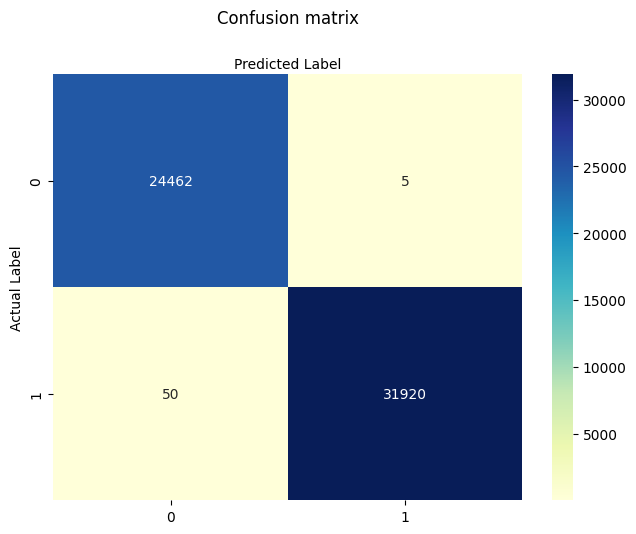

In [8]:
dtc_pred = dtc.predict(x_test.values)
Markdown("# Results: Decision Tree")
plotter(dtc_pred)

In [9]:
# train and save random forest
rfc = RandomForestClassifier().fit(smote_x.values, smote_y.values)
rfc_path = "../models/random_forest.joblib"
_ = dump(rfc, rfc_path)
Markdown(f"Saved random forest model to `{rfc_path}`")

Saved random forest model to `../models/random_forest.joblib`

# Results: Random Forest

[[24462     5]
 [   50 31920]]
Accuracy:  0.9990254620195971
Precision:  0.9998433829287392
Recall:  0.9984360337816703


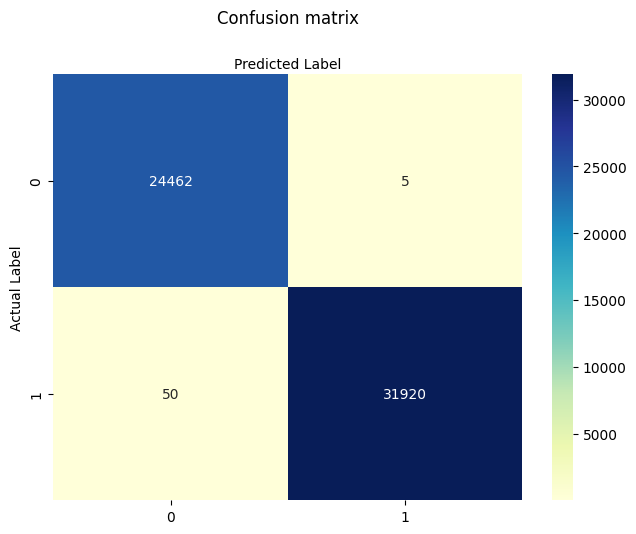

In [10]:
# test random forest
rfc_pred = rfc.predict(x_test.values)
Markdown("# Results: Random Forest")
plotter(rfc_pred)

In [11]:
# train and save gradient boosting
gbc = GradientBoostingClassifier().fit(smote_x.values, smote_y.values)
gbc_path = "../models/gradient_boosting.joblib"
_ = dump(gbc, gbc_path)
Markdown(f"Saved gradient boosting model to `{rfc_path}`")

Saved gradient boosting model to `../models/random_forest.joblib`

# Results: Gradient Boosting

[[24444    23]
 [   45 31925]]
Accuracy:  0.9987951166787745
Precision:  0.9992800801302116
Recall:  0.9985924304035033


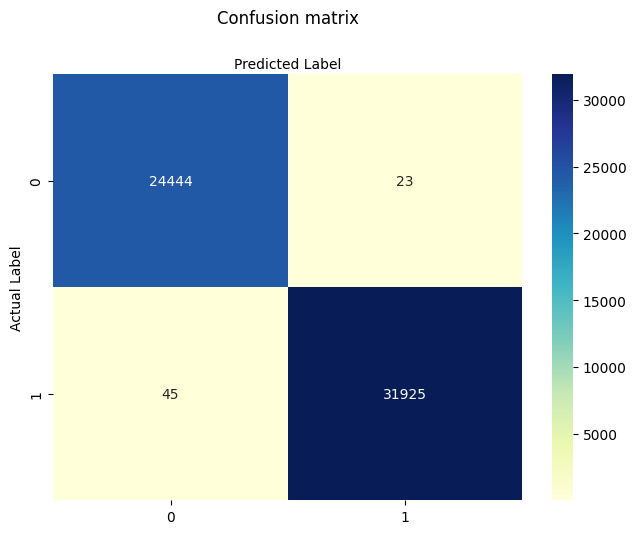

In [12]:
# test gradient boosting
gbc_pred = gbc.predict(x_test.values)
Markdown("# Results: Gradient Boosting")
plotter(gbc_pred)